# Example 14.6: Adiabatic Mixing

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Return air with a temperature of $27^\circ\mathrm{C}$, a relative humidity of $60\%$ and a volumetric flow rate of $25\ \mathrm{m^3/min}$ is mixed with $15\ \mathrm{m^3/min}$ of outside air with a temperature of $5^\circ\mathrm{C}$ and relative humidity of $20\%$. Determine the exit temperature, relative humidity, and volumetric flow rate.

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from thermoJFM.templates.humidair_default import *

### Given

In [2]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(27,'degC')
rel_hum[1] = Quantity(0.6,'')
Vdot[1] = Quantity(25,'m^3/min')

# State 2 - Exit
T[2] = Quantity(5,'degC')
rel_hum[2] = Quantity(0.2,'')
Vdot[2] = Quantity(15,'m^3/min')

display.Summary(locals());

<IPython.core.display.Latex object>

,T,Vdot,rel_hum
unit,°C,m³/s,
1,27,0.416667,0.6
2,5,0.250000,0.2


In [3]:
states.fix(1,humidair)
states.fix(2,humidair)

display.Summary(locals());

<IPython.core.display.Latex object>

,T,v,h,s,Vdot,T_wb,T_dp,rel_hum,omega
unit,°C,m³/kg_a,kJ/kg_a,kJ/K/kg_a,m³/s,°C,°C,,kg_water/kg_a
1,27,0.868404,61.542624,0.218969,0.416667,21.202464,18.579487,0.6,0.013483
2,5,0.788904,7.732413,0.029265,0.250000,-1.430624,-14.413276,0.2,0.001077


#### Exit properties

In [4]:
# Mass flow rates
mdot_a[1] = Vdot[1]/v[1]
mdot_a[2] = Vdot[2]/v[2]
mdot_a[3] = mdot_a[1] + mdot_a[2]

# 1st Law
h[3] = (mdot_a[1]*h[1] + mdot_a[2]*h[2])/(mdot_a[3])

# Water Balance
omega[3] = (mdot_a[1]*omega[1] + mdot_a[2]*omega[2])/(mdot_a[3])

# Exit Temperature
T[3] = humidair.T(h=h[3],omega=omega[3])
rel_hum[3] = humidair.rel_hum(h=h[3],omega=omega[3])

display.Calculations(locals(),comments=True);

 Mass flow rates

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 1st Law

<IPython.core.display.Latex object>

 Water Balance

<IPython.core.display.Latex object>

 Exit Temperature

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Psychrometric Chart

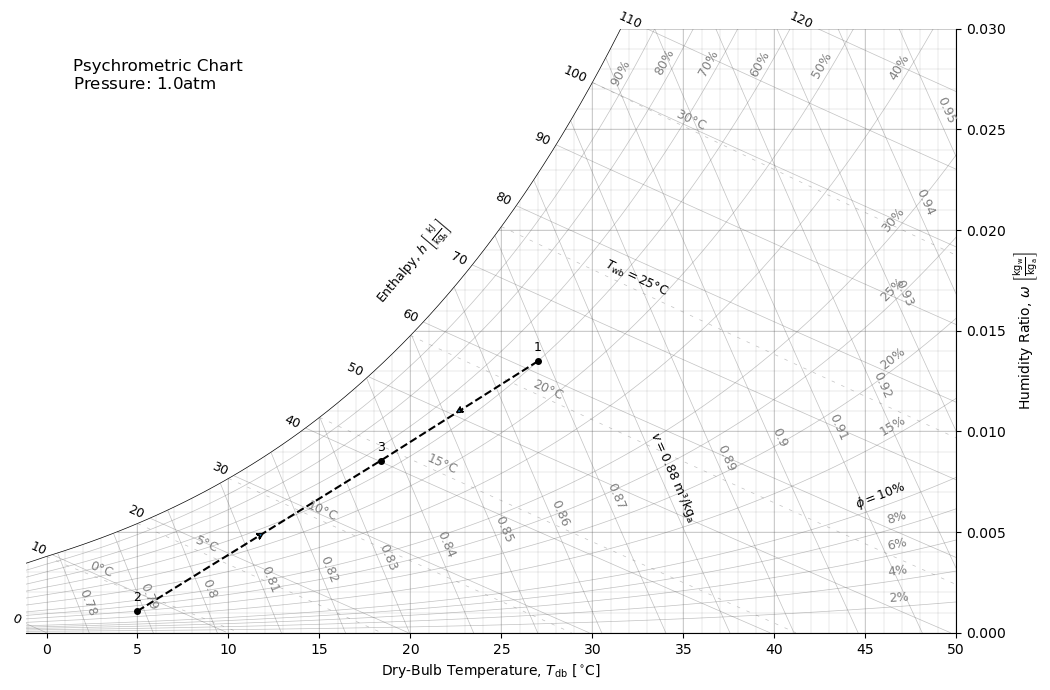

In [5]:
psych = humidair.psychrometric_chart(redraw=False)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2])
psych.plot_state(states[3])

# Plot Processes
psych.plot_process(states[1],states[3])
psych.plot_process(states[2],states[3]);
